In [ ]:
# Problem Statement : Given dataset we need to predict the points of the player denoted by pts in the dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder , StandardScaler , Normalizer
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Desktop/nba_2013.csv")
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [4]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [5]:
df.describe(include="object")

,player,pos,bref_team_id,season
count,481,481,481,481
unique,481,7,31,1
top,Anthony Tolliver,SG,TOT,2013-2014
freq,1,109,63,481


In [6]:
df[df.columns[df.isnull().sum() != 0]].dtypes

fg.     float64
x3p.    float64
x2p.    float64
efg.    float64
ft.     float64
dtype: object

In [7]:
df.fillna(df.mean(), inplace = True)

In [8]:
df[df.columns[df.isnull().sum() != 0]].dtypes

Series([], dtype: object)

In [9]:
X = df.drop(["pts"] , axis = 1)
y = df["pts"]

In [10]:
df.shape

(481, 31)

In [11]:
categorical = df.dtypes[df.dtypes == "object"].index

In [12]:
ENCODER = []
for i in df.dtypes[df.dtypes == "object"].index:
    encoder = LabelEncoder()
    X[i] = encoder.fit_transform(X[i])
    ENCODER.append(encoder)

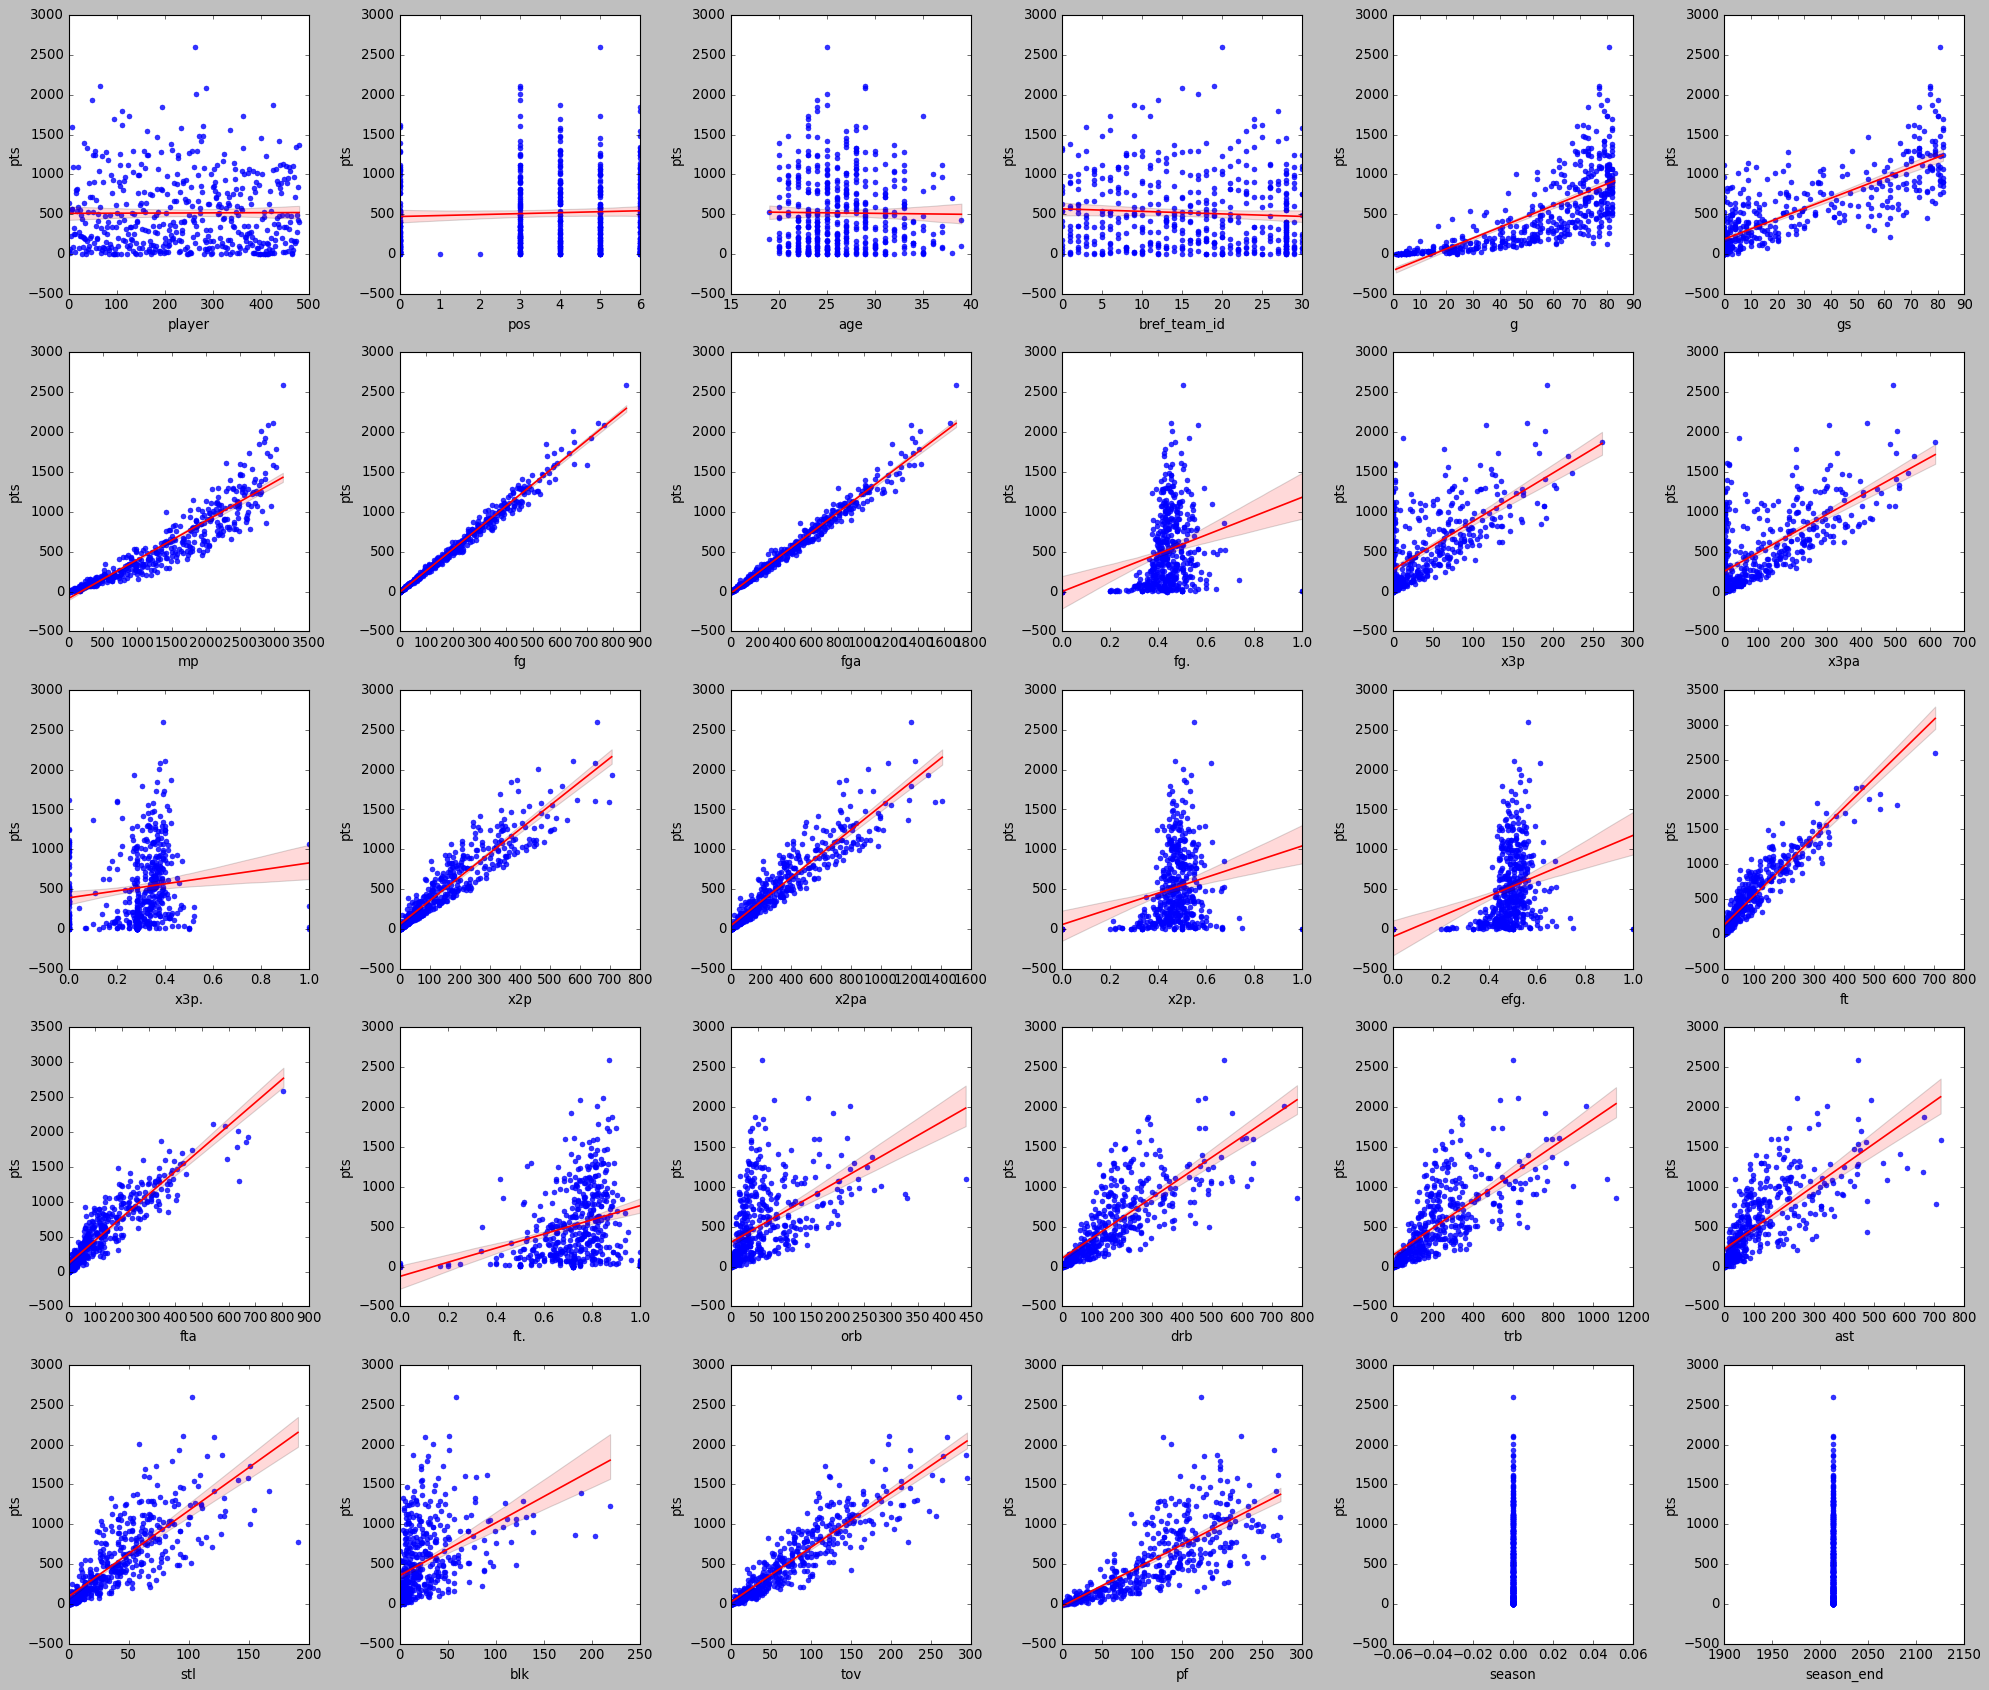

In [13]:
plt.style.use("classic")
fig = plt.figure(figsize=(25,25))
for i in range(30):
    plt.subplot(6,6, i+1)
    sns.regplot(data = X.join(y) , x = X.columns[i] , y = "pts" ,color = "blue", line_kws= {"color":"red"})
fig.tight_layout(pad = 1)
plt.show()

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


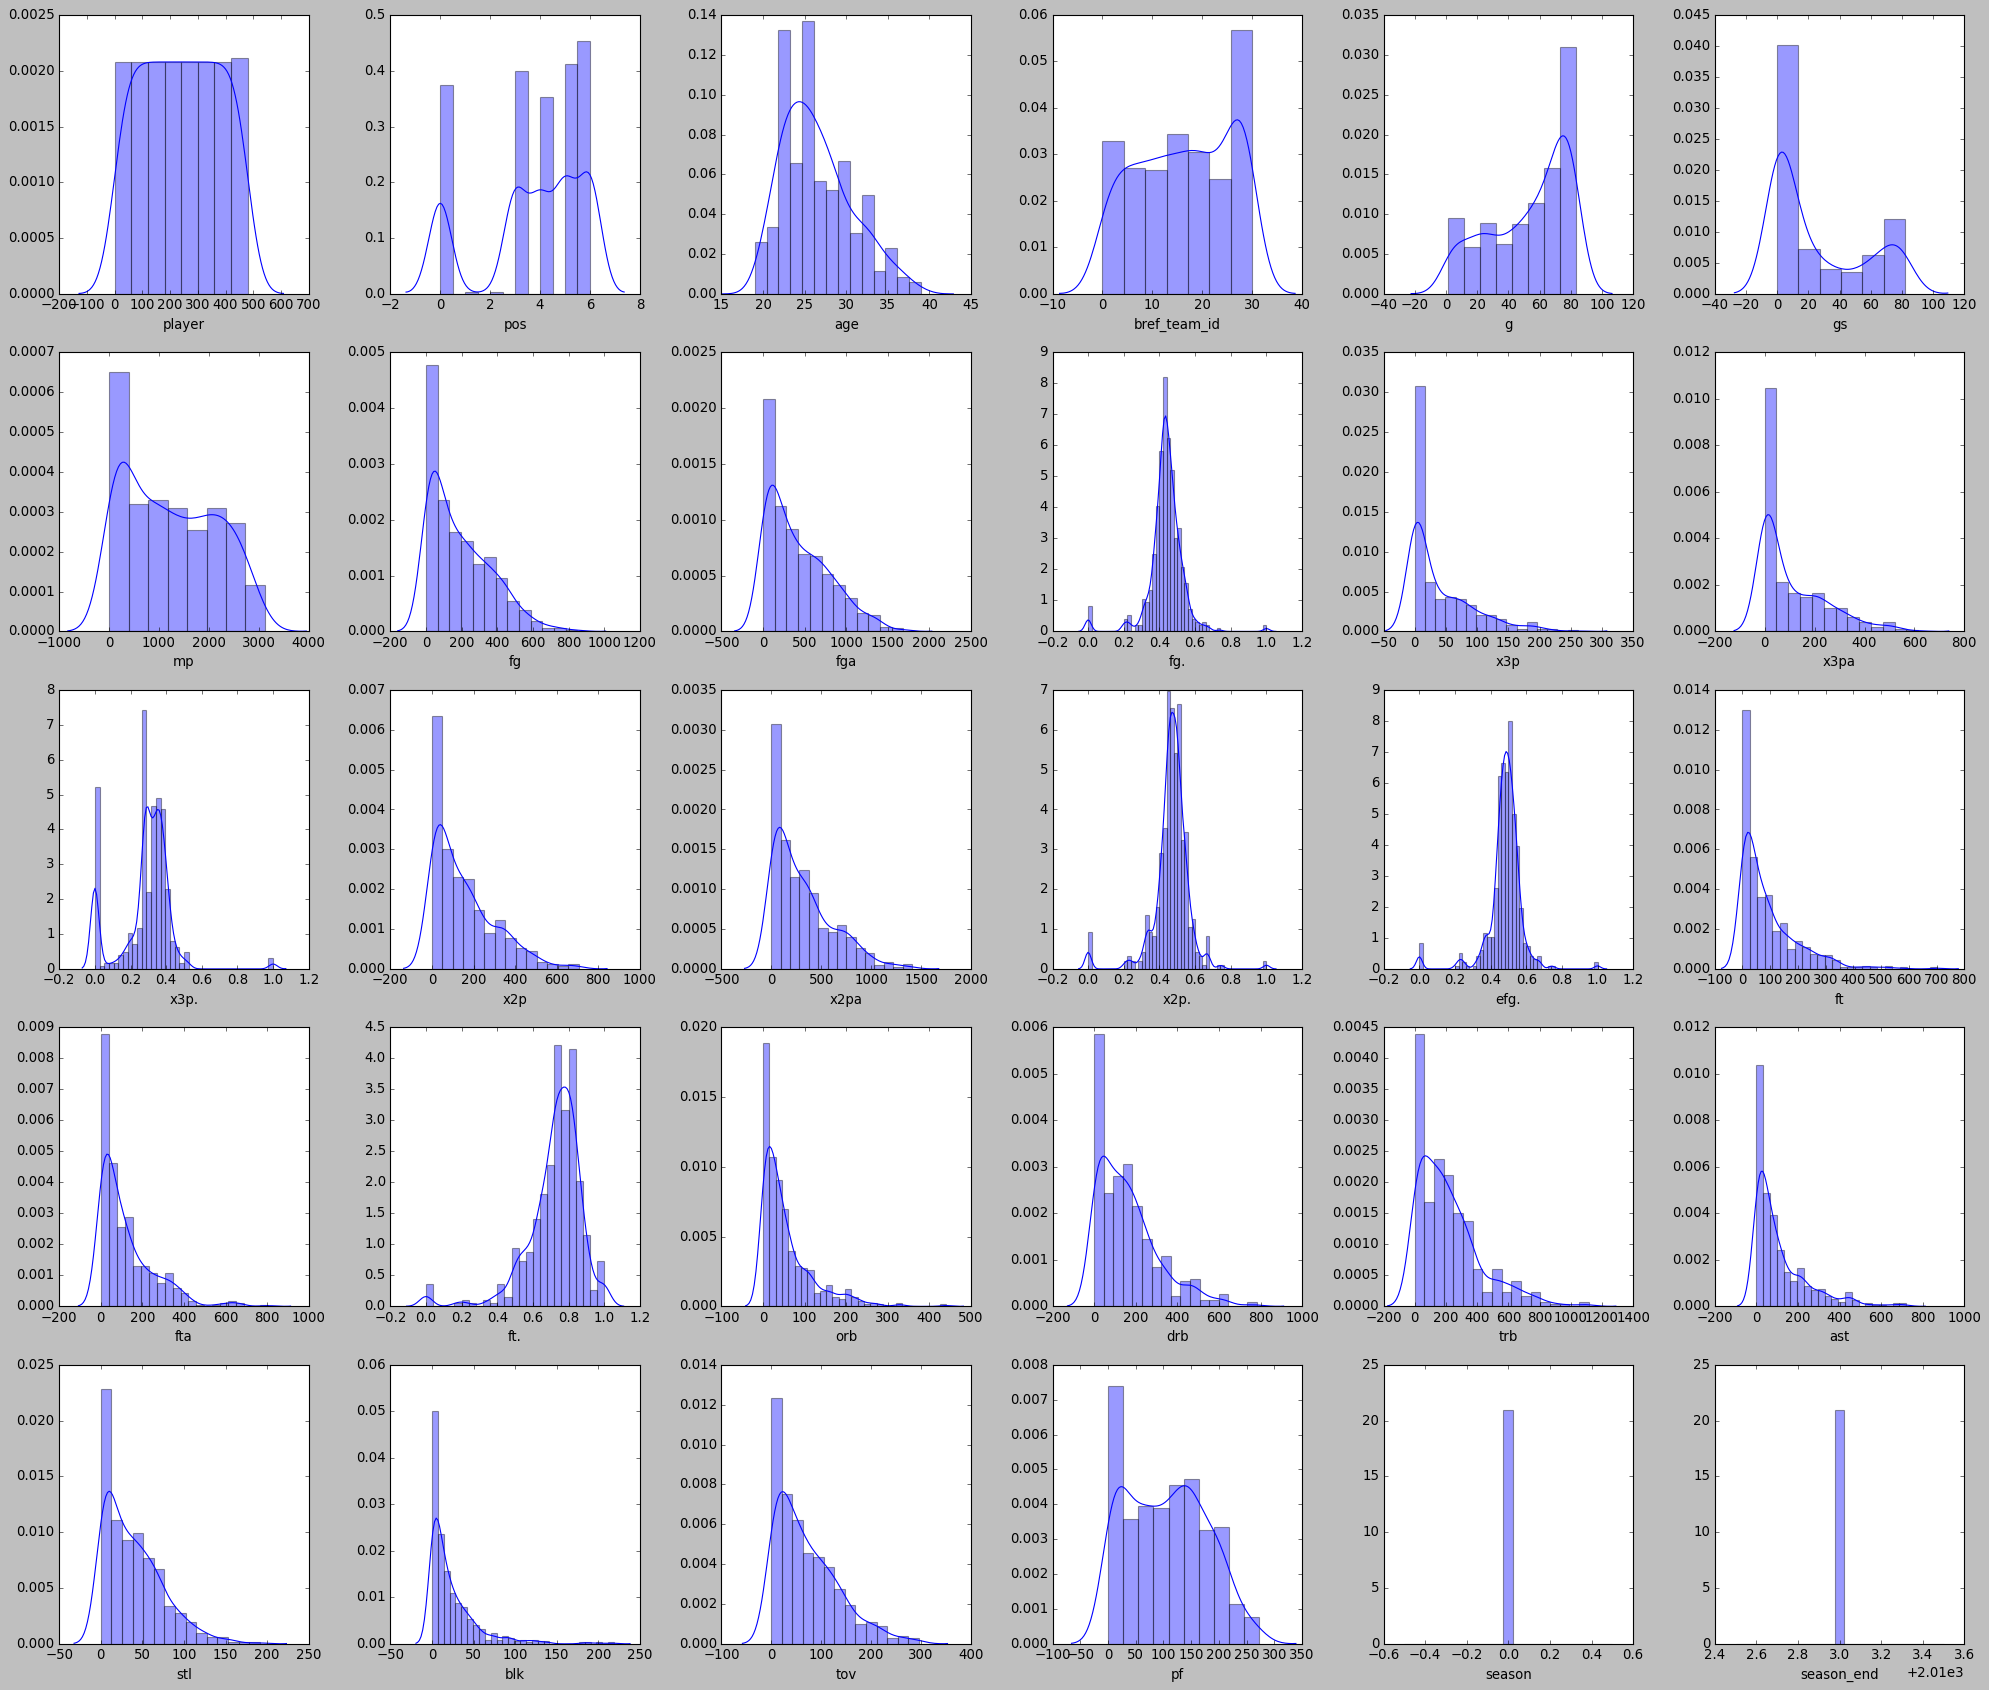

In [14]:
plt.style.use("classic")
fig = plt.figure(figsize=(25,25))
for i in range(30):
    plt.subplot(6,6, i+1)
    sns.distplot(X.iloc[:,i])
fig.tight_layout(pad = 1)
plt.show()

In [15]:
sc = StandardScaler()
X_new = pd.DataFrame(sc.fit_transform(X.drop(categorical , axis = 1)) ,columns= X.drop(categorical, axis = 1).columns)

In [16]:
X_new = X_new.join(X[categorical])

In [17]:
X_new.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ast,stl,blk,tov,pf,season_end,player,pos,bref_team_id,season
0,-0.836776,0.385287,-0.863104,-0.435541,-0.739170,-0.769305,0.320886,-0.701011,-0.717354,-1.262752e-01,...,-0.645891,-0.468543,0.061474,-0.668345,0.226751,0.0,370,5,28,0
1,-1.552101,1.096851,-0.188059,-0.045058,-0.581877,-0.649891,0.676707,-0.779747,-0.830465,-1.140124e-15,...,-0.531285,0.020702,1.066555,-0.013774,1.365358,0.0,431,0,20,0
2,0.116990,-0.010027,-0.458077,-0.308355,-0.290593,-0.405636,0.849534,-0.779747,-0.830465,-1.140124e-15,...,-0.569487,-0.439764,0.385694,-0.524659,0.029955,0.0,212,3,28,0
3,0.355432,0.780600,1.600813,1.466669,1.579447,1.591828,0.229389,1.739801,1.431746,9.691197e-01,...,1.034996,-0.123194,-0.684232,1.183611,0.423547,0.0,39,6,21,0
4,-0.359893,0.108567,0.149464,-0.319512,-0.331373,-0.476199,1.113858,-0.779747,-0.822924,-1.951934e+00,...,-0.554207,-0.468543,0.709913,-0.141496,1.140448,0.0,12,0,18,0


In [18]:
pca = PCA()
p = pca.fit_transform(X_new)

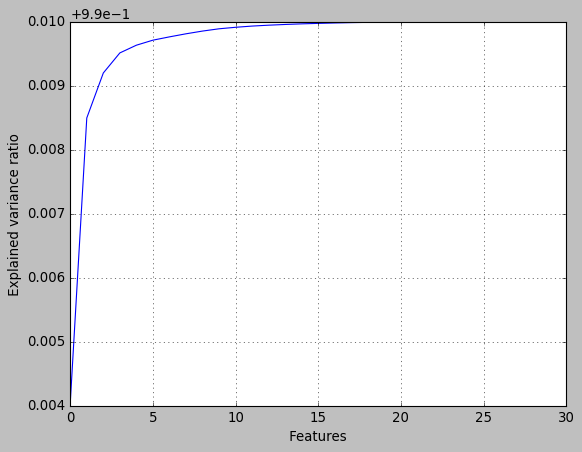

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(" Features ")
plt.ylabel(" Explained variance ratio ")
plt.grid(True)

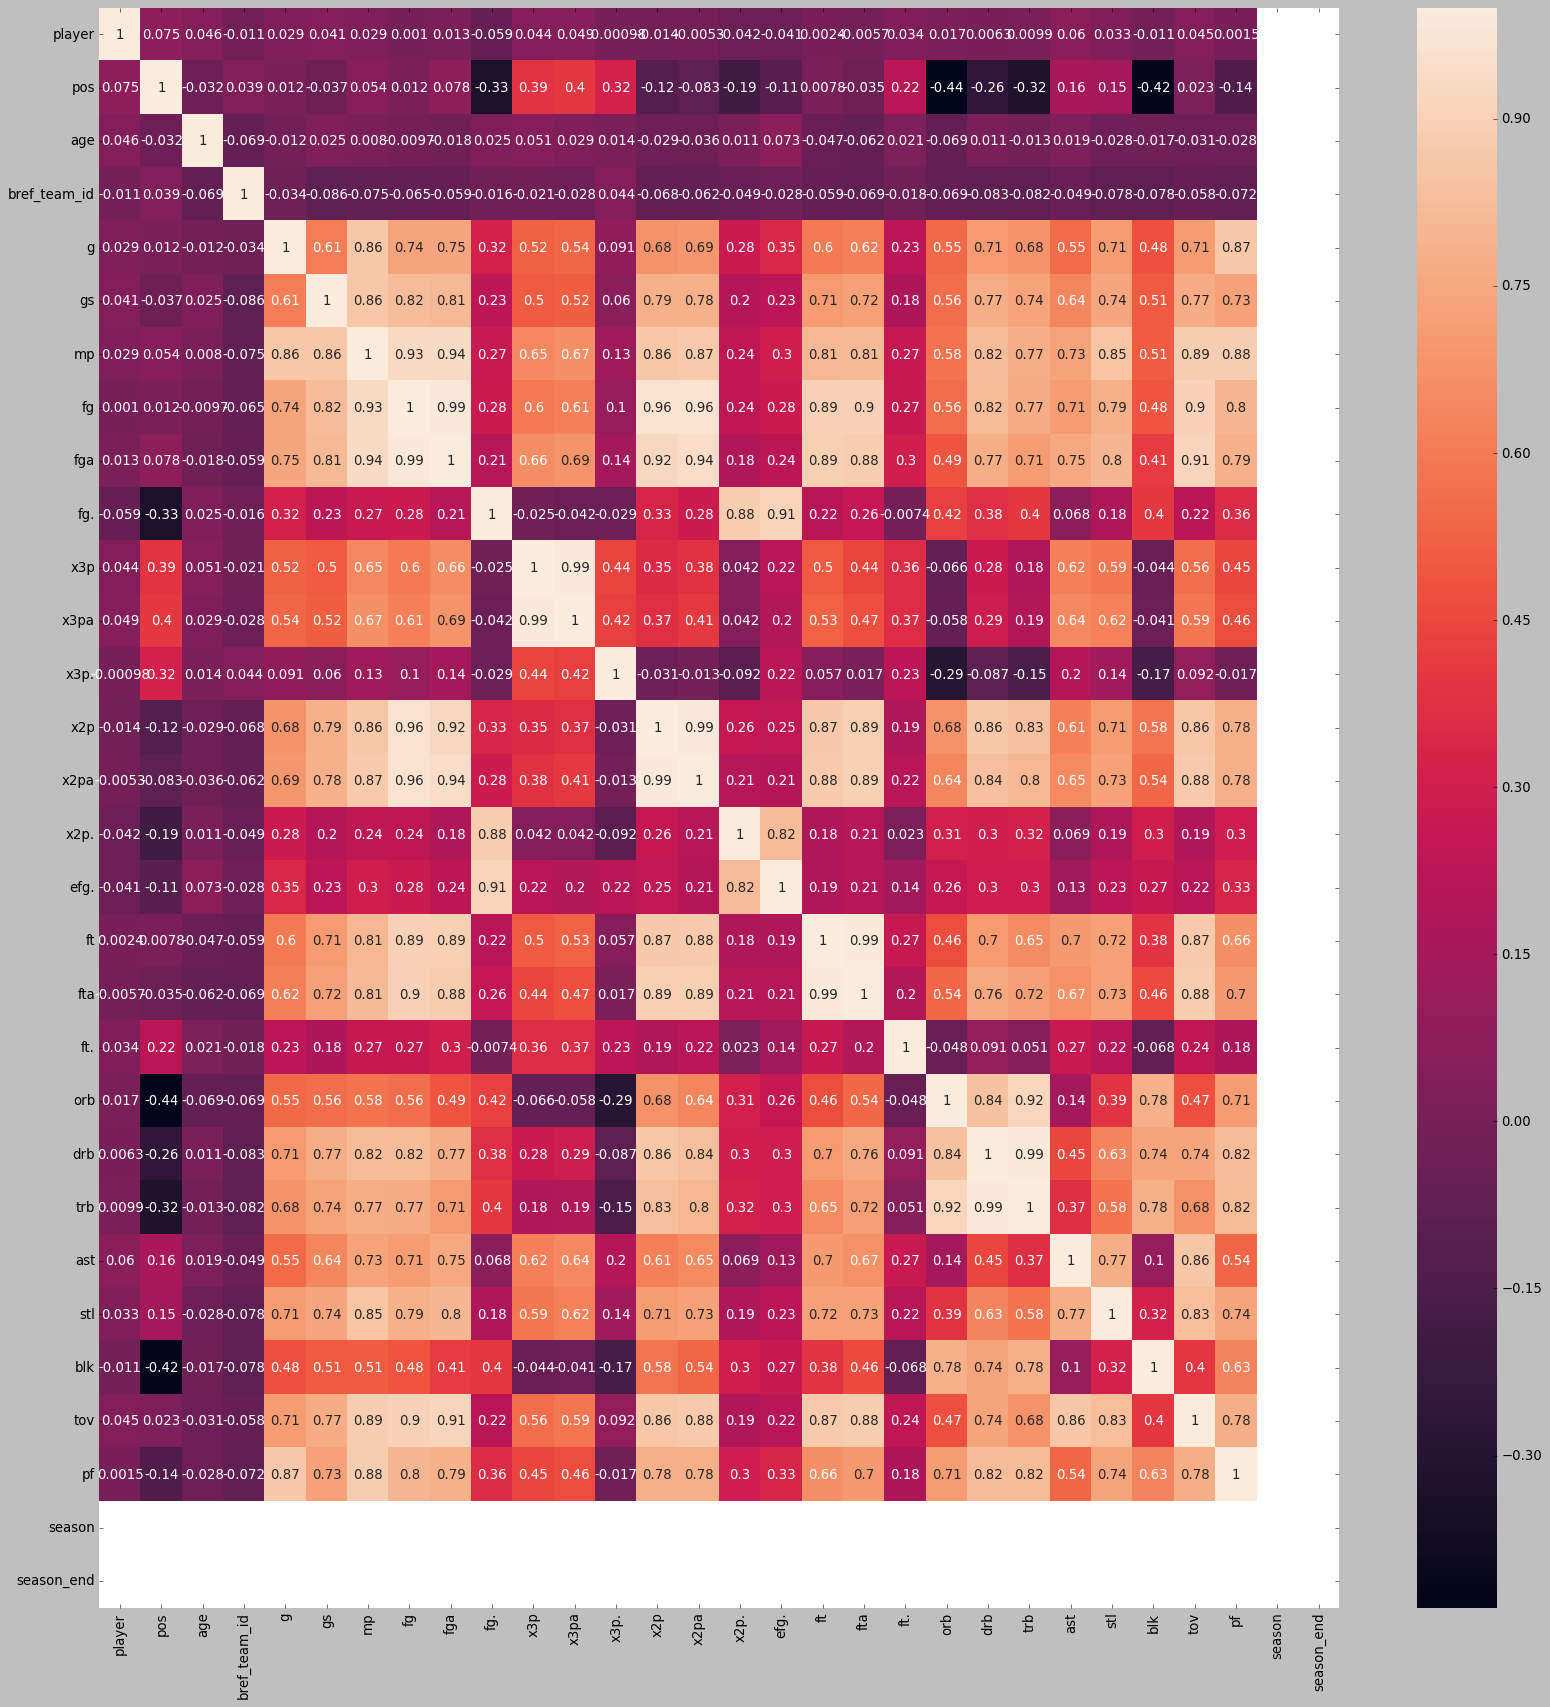

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(X.corr() , annot = True)

In [21]:
vif = []
for i in range(len(X_new.columns)):
    vif.append(variance_inflation_factor(np.array(X_new) , i))
VIF = pd.DataFrame({"Features": X_new.columns , "VIF":vif})

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [22]:
VIF

,Features,VIF
0,age,1.134687
1,g,8.003904
2,gs,6.206309
3,mp,45.443968
4,fg,inf
5,fga,inf
6,fg.,22.342685
7,x3p,inf
8,x3pa,inf
9,x3p.,1.923083


In [23]:
pca = PCA(n_components=15)
X_new = pca.fit_transform(X_new)
X_new = pd.DataFrame(X_new)

In [24]:
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-129.990492,-11.881611,-1.367987,0.183147,0.724827,1.795820,-0.181705,-0.792392,0.077093,-0.246150,0.450937,-0.535341,0.132264,0.260927,-0.117257
1,-190.991095,-3.813245,0.503852,4.639910,0.042334,-0.257349,-0.893133,-2.008811,0.664576,-0.419837,0.781659,-0.666155,0.384258,0.530070,0.353192
2,28.011516,-11.689430,-0.079390,1.918831,0.726402,0.861566,0.288651,0.013510,0.006882,0.461567,0.118685,-0.299063,-0.014771,0.356408,-0.089810
3,200.997872,-4.445744,4.525127,-3.642978,0.235341,-0.435552,-0.046676,0.892909,-0.131779,0.776147,-1.027196,-0.221459,-0.529096,-0.316241,-0.320116
4,228.006799,-1.492403,0.151016,4.177790,0.455490,-0.386961,-0.272002,-0.098999,-0.914824,-1.822628,0.071254,0.301683,0.141422,-0.160442,0.078778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,-208.998988,-5.804104,3.074679,-1.950833,-0.587794,1.479780,-2.043960,0.714309,0.809065,-0.233036,0.379542,-1.091498,0.337622,0.007636,0.026491
477,-105.006438,3.245523,2.180159,-3.244604,0.624388,-0.410764,-0.070874,0.254651,-0.336613,0.268401,-1.500306,-1.589179,0.329621,0.002504,0.406150
478,-196.997968,-5.615861,6.926421,0.266807,-0.787158,-0.239648,-0.194559,-0.340446,0.726010,-0.217280,0.176231,0.506320,-1.369623,-0.250219,1.801807
479,152.994278,13.460781,0.600254,3.638478,-1.817498,-0.159079,-1.206181,-0.590022,-0.397784,-1.628881,0.379490,-1.202359,0.259909,0.402660,-0.016059


In [25]:
x_train , x_test , y_train , y_test = train_test_split(X_new , y , test_size = 0.25 , random_state = 101)

In [28]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test , y_test)

0.9962453861115216

In [30]:
from sklearn.linear_model import Ridge , Lasso
lr = Lasso()
lr.fit(x_train, y_train)
lr.score(x_test , y_test)

0.9961799955917603

In [32]:
from sklearn.metrics import r2_score
r2_score(lr.predict(x_test) , y_test)

0.9961545656836214

In [34]:
# Since got enough accuracy hyperparameter tunning and rest of the steps are avoided because